In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
from scipy.integrate import simpson

In [18]:
df = pd.read_csv("data/baseline_extremely_fine.csv")
df.head()

,x,y,u
0,-3.102522,0.545219,0.264439
1,-3.122057,0.522610,0.225593
2,-3.141593,0.500000,0.187298
3,-3.090692,0.524080,0.299916
4,-3.110227,0.500737,0.255493


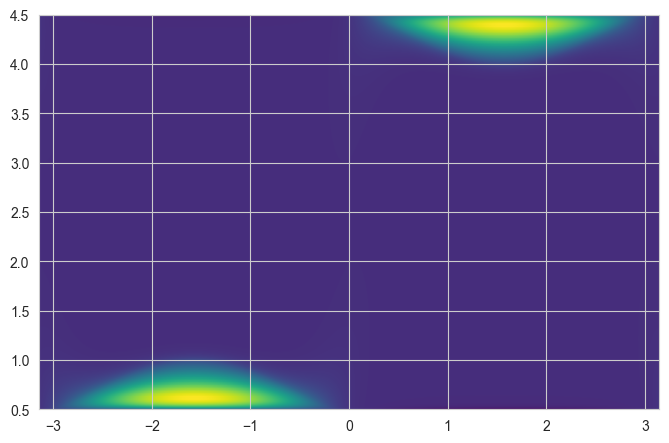

In [ ]:
# plot a heatmap
x_unique = np.linspace(df['x'].min(), df['x'].max(), 1000)
y_unique = np.linspace(df['y'].min(), df['y'].max(), 1000)
X, Y = np.meshgrid(x_unique, y_unique)
U = griddata((df['x'], df['y']), df['u'], (X, Y), method='cubic')
U = np.nan_to_num(U, nan=0)  

df_pivot = df.pivot(index='y', columns='x', values='u')
plt.figure(figsize=(8,6))
plt.imshow(U, cmap='viridis', origin='lower', extent=[df['x'].min(), df['x'].max(), df['y'].min(), df['y'].max()])
plt.show()

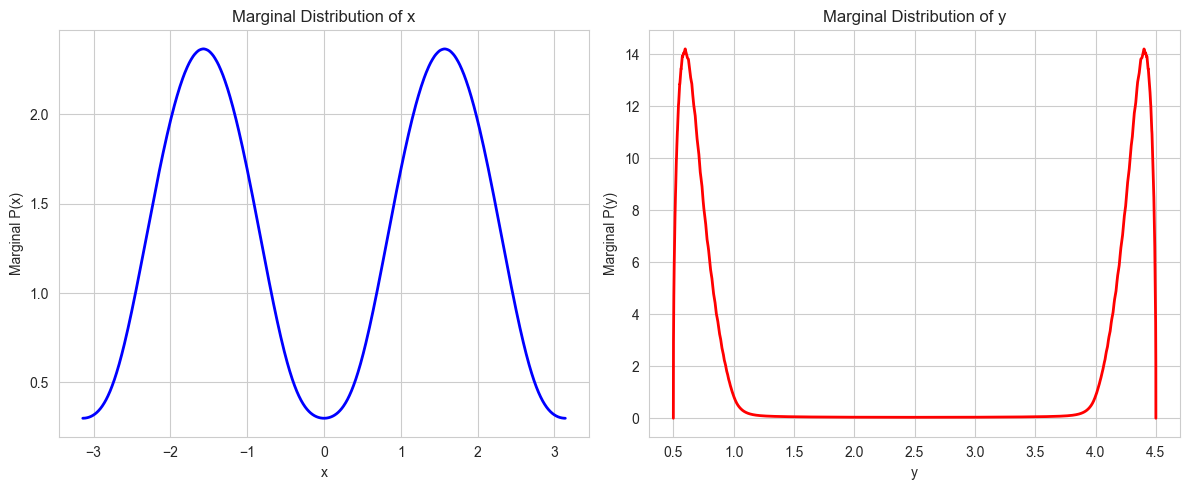

In [21]:
# Compute marginals
P_x = simpson(U, x=y_unique, axis=0)
P_y = simpson(U, x=x_unique, axis=1)


sns.set_style("whitegrid")

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


sns.lineplot(x=x_unique, y=P_x, ax=axes[0], color='blue', lw=2)
axes[0].set_xlabel("x")
axes[0].set_ylabel("Marginal P(x)")
axes[0].set_title("Marginal Distribution of x")

sns.lineplot(x=y_unique, y=P_y, ax=axes[1], color='red', lw=2)
axes[1].set_xlabel("y")
axes[1].set_ylabel("Marginal P(y)")
axes[1].set_title("Marginal Distribution of y")

plt.tight_layout()
plt.show()

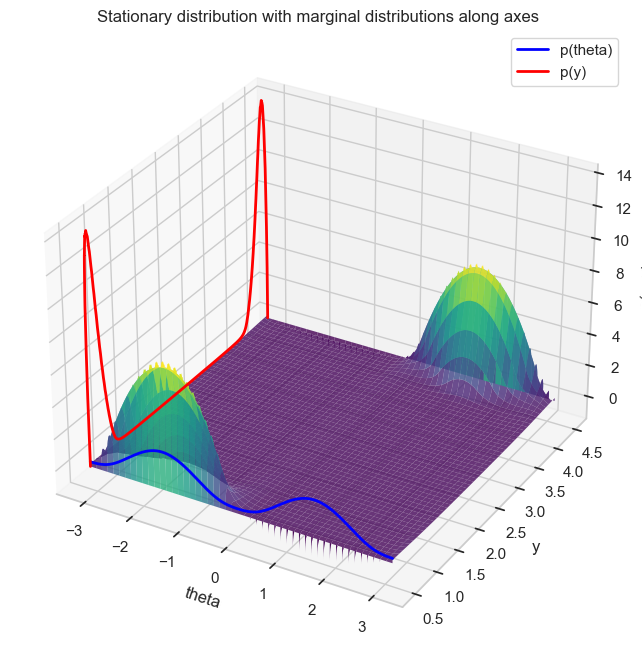

In [33]:
# Set up figure
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Surface plot of u(x, y)
ax.plot_surface(X, Y, U, cmap='viridis', edgecolor='none', alpha=0.8)

# Marginal P(x) - Add as a line plot on X-axis
ax.plot(x_unique, np.full_like(x_unique, y_unique.min()), P_x, color='blue', lw=2, label='p(theta)')

# Marginal P(y) - Add as a line plot on Y-axis
ax.plot(np.full_like(y_unique, x_unique.min()), y_unique, P_y, color='red', lw=2, label='p(y)')

# Labels
ax.set_xlabel("theta")
ax.set_ylabel("y")
ax.set_zlabel("p(x, y)")
ax.set_title("Stationary distribution with marginal distributions along axes")
ax.legend()

plt.show()


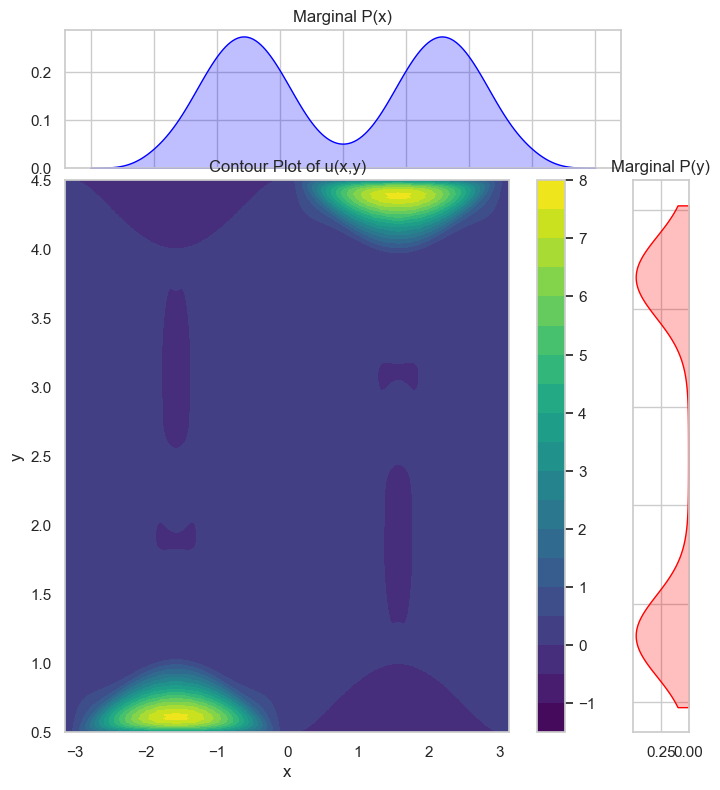

In [24]:
sns.set_theme(style="whitegrid")

# Create figure and gridspec
fig = plt.figure(figsize=(10, 10))
gs = fig.add_gridspec(3, 3, width_ratios=[1, 4, 0.4], height_ratios=[1, 4, 0.4], hspace=0.05, wspace=0.05)

# Marginal P(x) (Above contour plot)
ax_marg_x = fig.add_subplot(gs[0, 1])
sns.kdeplot(x=x_unique, weights=P_x, ax=ax_marg_x, color='blue', fill=True)
ax_marg_x.set_xticklabels([])
ax_marg_x.set_ylabel("")
ax_marg_x.set_title("Marginal P(x)")

# Marginal P(y) (Right of contour plot)
ax_marg_y = fig.add_subplot(gs[1, 2])
sns.kdeplot(y=y_unique, weights=P_y, ax=ax_marg_y, color='red', fill=True)
ax_marg_y.set_yticklabels([])
ax_marg_y.set_xlabel("")
ax_marg_y.set_title("Marginal P(y)")
ax_marg_y.invert_xaxis()

# Contour Plot of u(x,y)
ax_contour = fig.add_subplot(gs[1, 1])
contour = ax_contour.contourf(X, Y, U, cmap="viridis", levels=20)
fig.colorbar(contour, ax=ax_contour, orientation="vertical")
ax_contour.set_xlabel("x")
ax_contour.set_ylabel("y")
ax_contour.set_title("Contour Plot of u(x,y)")

plt.show()

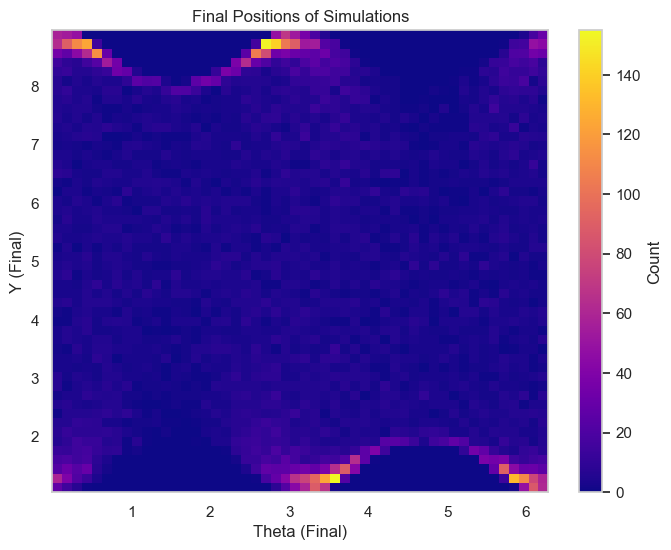

In [28]:
# Plotting trajectories
df1 = pd.read_csv('data/simulations_baseline-04-03-2025.csv')
df2 = pd.read_csv('data/simulations_baseline_ii_-04-03-2025.csv')
df3 = pd.read_csv('data/simulations_baseline_iii_-04-03-2025.csv')

dataframes = [df1, df2, df3]

# Extract final (theta, y) values for each simulation
final_positions = []

for df in dataframes:
    final_pos = df.groupby("simulation").agg({"theta": "last", "y": "last"})
    final_positions.append(final_pos)

# Combine all final positions into one DataFrame
final_positions = pd.concat(final_positions)

# Extract theta and y values
theta_final = final_positions["theta"].values
y_final = final_positions["y"].values

# Create a 2D histogram
plt.figure(figsize=(8, 6))
plt.hist2d(theta_final, y_final, bins=50, cmap="plasma")  # Adjust bins as needed
plt.colorbar(label="Count")
plt.xlabel("Theta (Final)")
plt.ylabel("Y (Final)")
plt.title("Final Positions of Simulations")

plt.show()

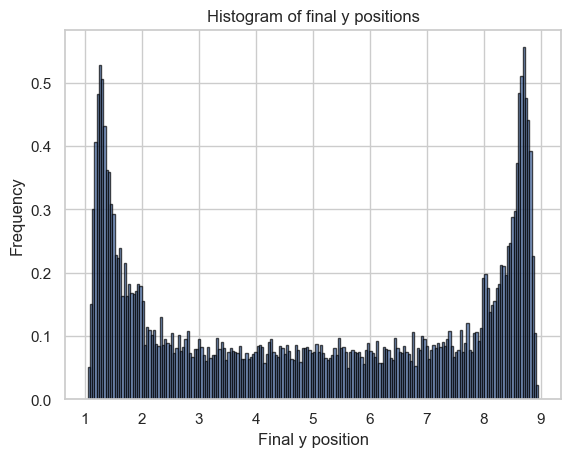

In [29]:
plt.hist(y_final, bins=200, edgecolor='black', alpha=0.7, density=True)
plt.xlabel("Final y position")
plt.ylabel("Frequency")
plt.title("Histogram of final y positions")
plt.grid(True)
plt.show()

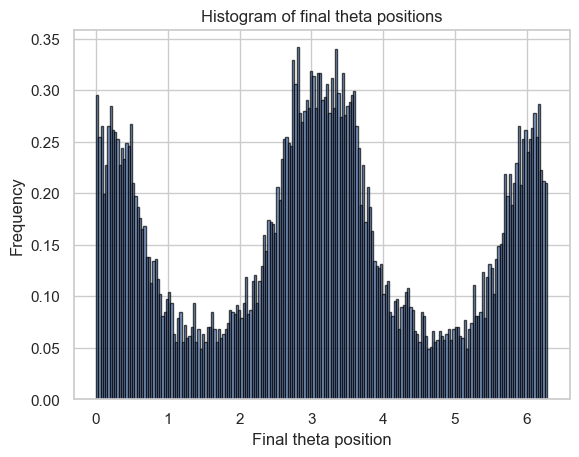

In [30]:
# Plot histograms
plt.hist(theta_final, bins=200, edgecolor='black', alpha=0.7, density=True)
plt.xlabel("Final theta position")
plt.ylabel("Frequency")
plt.title("Histogram of final theta positions")
plt.grid(True)
plt.show()
